In [49]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [50]:
all_season = pd.read_csv('all_season.csv', index_col=0)
advanced = pd.read_csv('advanced.csv', index_col=0)

In [ ]:
all_season[all_season['Player']]

In [51]:
df = pd.merge(all_season, advanced, on=['href','Season'],)

In [ ]:
df.drop(columns=['Player_y', 'Age_y', ''])

In [58]:
df[df.Age_y != df.Age_x].loc[:, ["Age_x", "Age_y"]]

,Age_x,Age_y


In [56]:
df.iloc[10227]

Season                 2014
Age_x                    28
Tm_x                    PHO
Lg_x                    NBA
Pos_x                    SG
G_x                      52
GS                       52
MP_x                   33.4
FG                      6.5
FGA                    13.1
FG%                   0.501
3P                      1.3
3PA                     3.6
3P%                   0.355
2P                      5.3
2PA                     9.5
2P%                   0.556
eFG%                  0.549
FT                      1.9
FTA                     2.5
FT%                   0.746
ORB                       1
DRB                     2.6
TRB                     3.6
AST                     4.1
STL                       1
BLK                     0.2
TOV                     2.2
PF                      2.3
PTS                    16.2
                   ...     
allstar                   0
Age_y                    28
Tm_y                    TOT
Lg_y                    NBA
Pos_y               

In [ ]:
a = pd.merge(df, df2, how='left', on=['Season'])

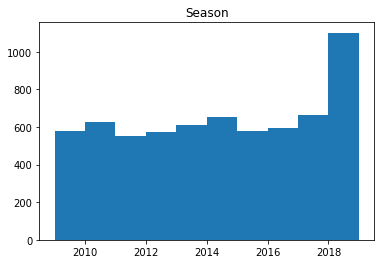

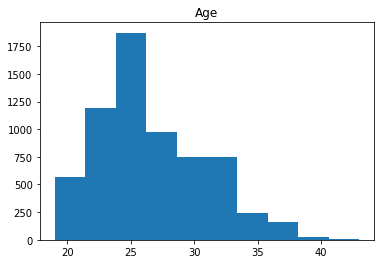

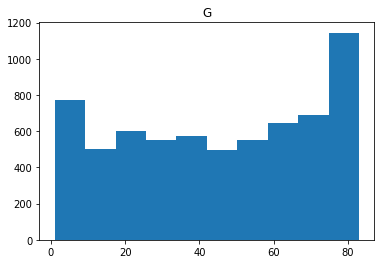

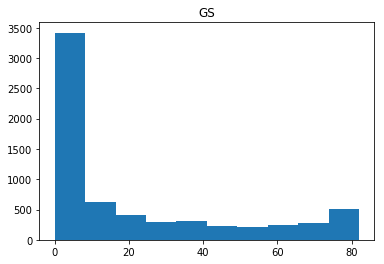

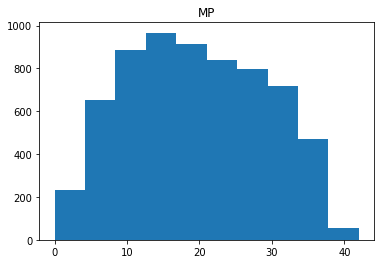

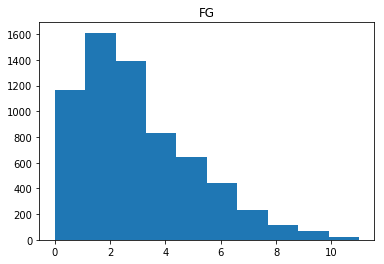

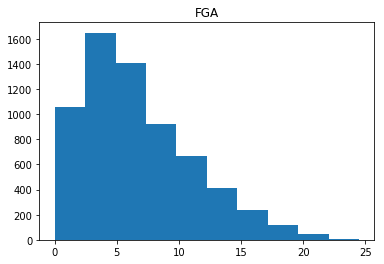

C:\Users\Drew\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Drew\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


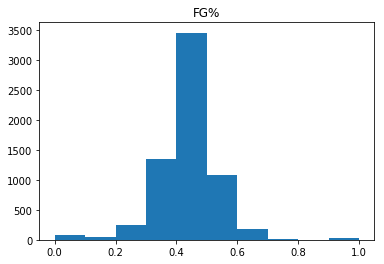

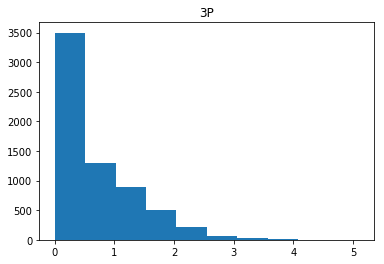

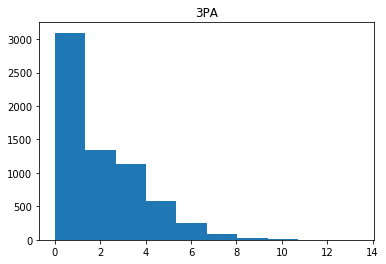

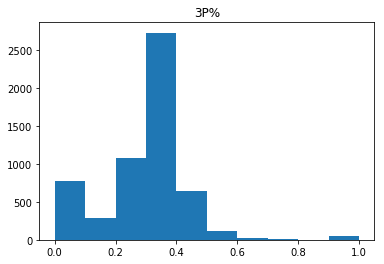

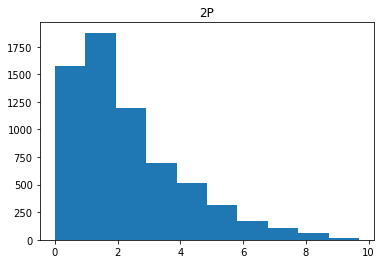

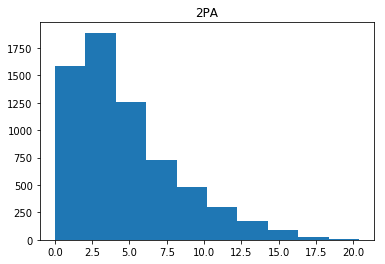

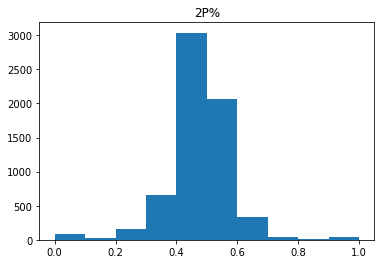

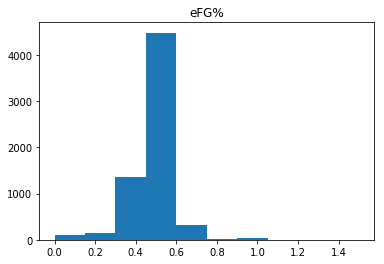

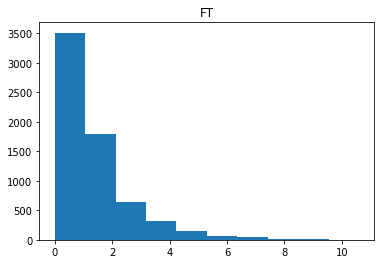

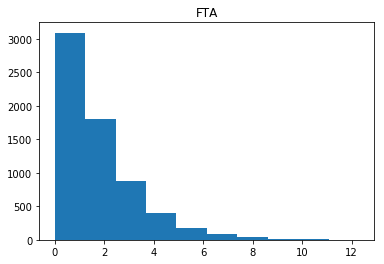

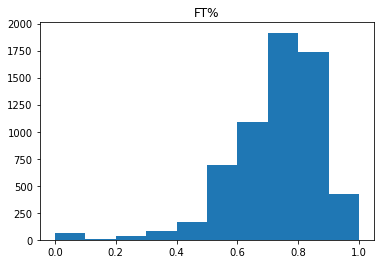

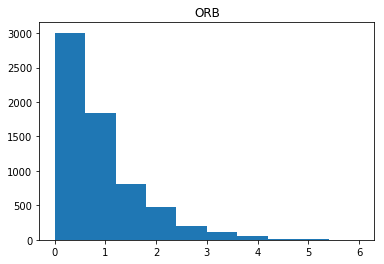

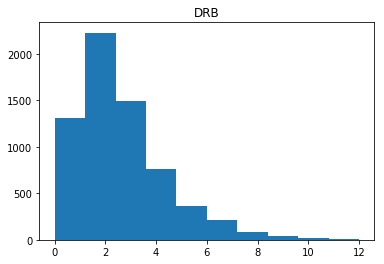

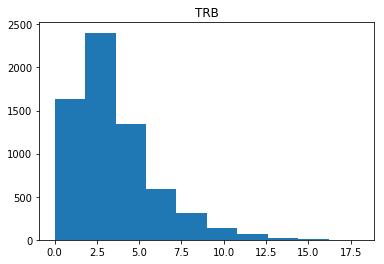

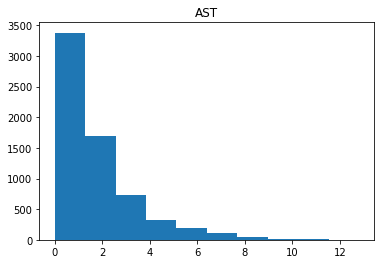

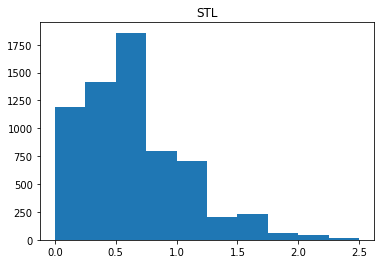

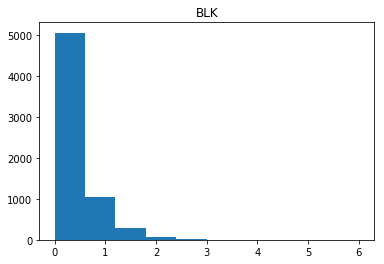

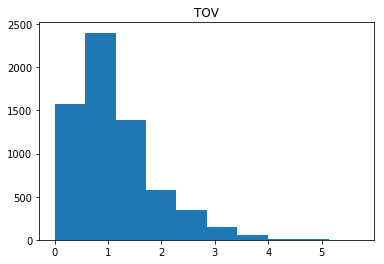

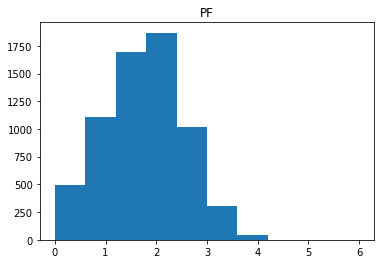

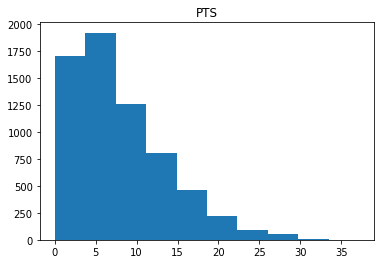

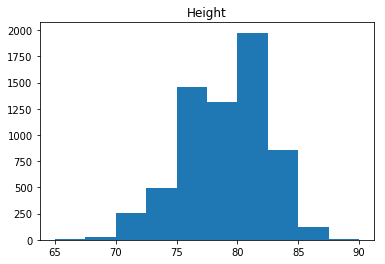

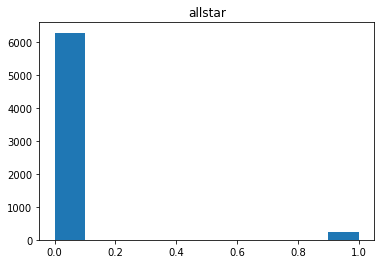

In [10]:

for col in df:
    if pd.api.types.is_numeric_dtype(df[col]):
        _ = plt.hist(df[col])
        _ = plt.title(col)
        _ = plt.show()


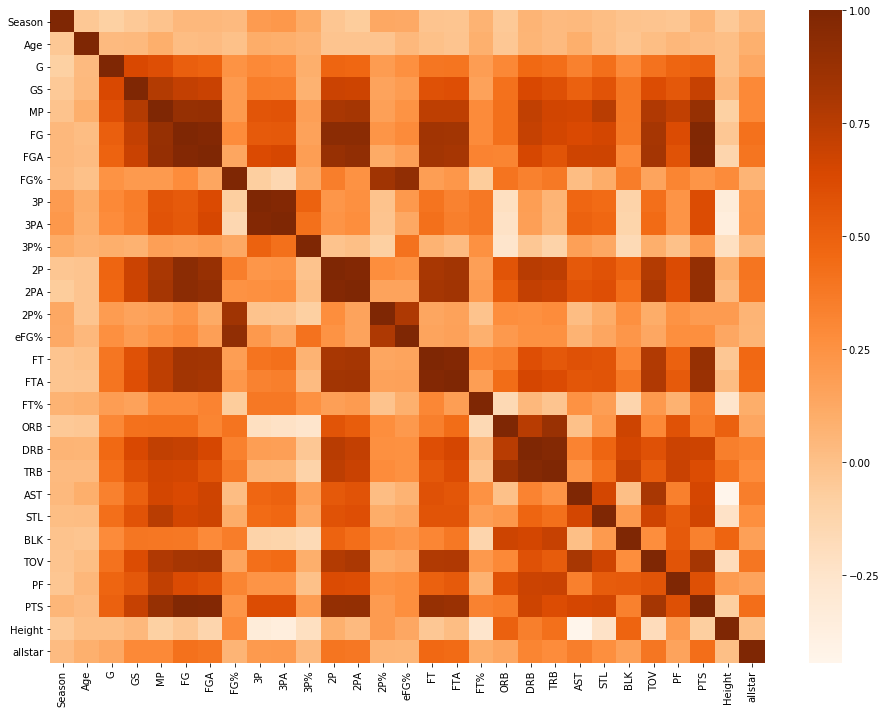

In [17]:
_ = plt.figure(figsize=(16,12))
_ = sns.heatmap(df.corr(), cmap='Oranges')

In [88]:
def compare_correlations(corr_df, col1, col2, target):
    '''Given a correlation dataframe and two separate 
       dataframe columns, determine which column has
       a lower absolute correlation to the target 
       variable and return it.'''
    
    cord = {abs(corr_df.loc[target, col1]):col1,
            abs(corr_df.loc[target, col2]):col2
           }
    
    return cord[min(cord)]

In [96]:
def find_col(corr_df, col1, threshold=0.8):
    '''identifies colinear columns and
       returns Series of column names and
       correlation coefficients.'''
    
    return corr_df.loc[col1, abs(corr_df[col1]) > threshold]

In [127]:
def remove_colinear(df, target, threshold=0.8):
    '''Given a dataframe, remove colinear features
       based on which is more highly correlated with
       the target variable. Optional threshold variable
       sets correlation coefficient value at which
       a feature is dropped.'''
    
    drop_set = set()
    # Create correlation dataframe
    corr_df = df.corr()
    
    # identify colinear columns
    for col in corr_df:
        colinear_series = find_col(corr_df, col)
        if len(colinear_series) > 1:
            for subcol in colinear_series.index:
            # add least correlated column to drop_set
                drop_set.add(compare_correlations(corr_df, col, subcol, target))
    # drop colinear variable with lower
    # correlation to target
    return list(drop_set)

In [129]:
df.drop(columns=remove_colinear(df, 'allstar'), inplace=True)
df.drop(columns=['Season'], inplace=True)
df.fillna(0, inplace=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

int_df = df.select_dtypes(exclude=object)
features = int_df[kbestfeat[:10]].values
target = int_df.loc[:, 'allstar_next'].values

Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, 
                                                stratify=target,
                                               random_state=13)
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

lr = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=13)
parameters = {'C':[0.001, 0.1, 1, 10, 10e8],
              'fit_intercept': [True, False]
             }
gscv = GridSearchCV(lr, parameters, cv=5, 
                          scoring = 'f1',
                          error_score=np.nan)

In [159]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


int_df = df.select_dtypes(include='number')
features = int_df.loc[:, int_df.columns != 'allstar'].values
target = int_df['allstar'].values

X_train, X_test, y_train, y_test = train_test_split(
    features, target, random_state=42,
    stratify=target)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


lr = LogisticRegression(solver='lbfgs')

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)



In [162]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1570
           1       0.29      0.06      0.11        62

    accuracy                           0.96      1632
   macro avg       0.62      0.53      0.54      1632
weighted avg       0.94      0.96      0.95      1632

